<a href="https://colab.research.google.com/github/campusplage/compte-rendus-calmdown/blob/master/TP2_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de données multidimensionnelles
## Sylvain Povia & Clément Cisterne

# TP 2: Utiliser l'analyse en composantes principales de `scikit-learn`




---
Ce notebook contient votre compte-rendu pour le TP2.
Il s'agit d'un travail que nous commencerons ensemble, puis que vous pouvez continuer de votre côté jusqu'à la date limite de soumission qui est le __lundi 2 décembre à 6h__.

---

# Manipuler github et soumettre votre travail (5 points)

> Vous serez notés sur votre aptitude à correctement soumettre votre travail par le biais d'un gestionnaire de version.
  __La procédure à suivre sera la même pour tous les TP. Sa mise en œuvre correspond au quart de la note.__

## b. Ouvrir votre travail

Vous avez deux options pour ouvrir votre notebook:
  * Sur la page de votre répo, cliquez dessus puis `open in colab`
  * directement sur [colab.research.google.com](colab.research.google.com), cliquez sur `File` $\rightarrow$ `Open notebook`, puis choisissez l'onglet `github` et retrouvez le colab après avoir sélectionné le bon répo.


## a. Sauvegarder votre travail

Vous êtes invités à régulièrement sauvegarder votre travail sur le répo (et non pas sur votre google drive uniquement).

Pour cela:
1. Cliquez sur `File` $\rightarrow$ `Save a copy in github`
2. Si c'est la première fois que vous le faites, autorisez l'accès à google colab l'accès à votre compte github. Suivez simplement les instructions.
3. Ensuite, sur la page qui s'affiche, sélectionnez le répo de votre compte rendu, puis `OK`. Appelez votre notebook `TP1.ipynb`.
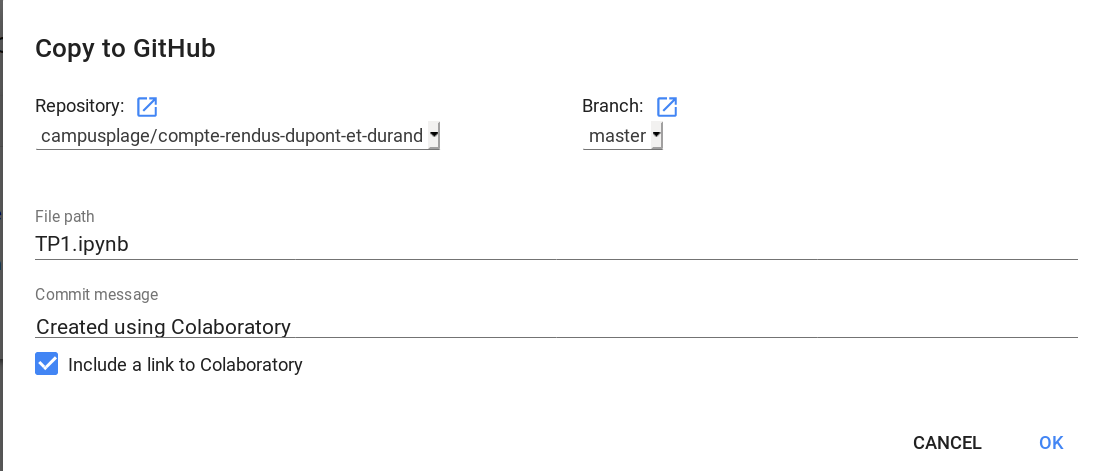

> Vous êtes chaleureusement invités à donner un message informatif pour décrire chaque `commit`, et donc à changer ce _created using colaboratory_ qui s'affiche par défaut. (Cela fera bien sûr partie des critères de notation).

## c. Récupérer une version plus ancienne

L'intérêt principal de travailler avec un gestionnaire de version comme git est de pouvoir à tout moment revenir en arrière !

Si vous en avez besoin, parcourez les différents _commits_ de votre répo, et chargez les fichiers correspondants.  
Tout est sauvegardé sur github ! C'est un énorme avantage par rapport à un google drive, un dropbox, un fichier en local, etc.

# 1. Charger et manipuler des données LFW (3 points)

## a. Téléchargement des données

Dans ce TP, nous allons travailler avec un autre ensemble de données provenant du challenge [_labeled faces in the wild_](http://vis-www.cs.umass.edu/lfw/). Il s'agit d'un ensemble de photos de visages en noir et blanc.

In [0]:
# différents imports utiles par la suite
import pandas
import sklearn
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random

# Téléchargement des données
d = fetch_lfw_people(min_faces_per_person=50, resize=0.4)

## b. Accès aux données

Dans la cellule précédente, nous avons téléchargé des données contenant un gros milliers d'images noires et blanc de visages d'hommes politiques.  

Ces données sont regroupées dans variable `data_dict`, qui est un _dictionnaire_ ([dict](https://docs.python.org/3/library/stdtypes.html#mapping-types-dict)).

> Un dictionnaire est une structure de donnée qui permet de regrouper plusieurs valeurs hétérogènes, un peu à la manière d'une ligne donnée d'un `DataFrame` de pandas.
>
> Par exemple, on peut définir le dictionnaire suivant:
> ```python
student = {'name':'Dupont',
           'first name': 'Jean',
           'age': 23,
           'marks': [10, 13, 15.5, 11]
           }
  ```
> Il est constitué de 4 entrées appelées _clés_ (keys), qu'on peut lister par la méthode du même nom:
> ```python
  student.keys()
  ```  
> Et  on peut accéder à une entrée donnée par l'opérateur `[]` ou bien par `.`:
>```python
student['age']
student.age
```


In [0]:
# listez les clés de la variable `d`
...
for cle in d:
  print(cle)

data
images
target
target_names
DESCR


## c. Manipulations élémentaires de `ndarrays`

Affichez le type de toutes les entrées de `d`

> utilisez les fonctions `print` et `type` dans une boucle `for`

In [0]:
# Votre travail ici
for data in d.data:
  print(type(data))

Comme vous le voyez, les données sont des [`ndarray`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html), la structure de base de la bibliothèque `numpy` qu'on a déja vue.

Cette structure très puissante de données numériques permet de facilement faire des calculs et accédez à des données.

In [0]:
# Affichez la dimension de d.images (utilisez la propriété `shape` des `ndarrays`)
d.images.shape
# (comme on le voit, c'est un tableau 3D.)

(1560, 50, 37)

In [0]:
# créez les variables nb_samples, height et width correspondantes
# (indice: testez d'abord `a, b, c = [1, 2, 3] )
nb_samples, height, width = d.images.shape

Comme vous le constatez, `d.images` regroupe $1560$ images, chacune étant de dimensions $50\times 37=1850$ pixels.

In [0]:
# chaque ligne de `d.data` n'est rien d'autre que la version aplatie de l'image
# correspondante dans `d.images`. 
print('Are d.data[10] and d.images[10].flatten() the same ?',
      np.allclose(d.data[10], d.images[10].flatten()))
# (où on a rencontré la fonction `allclose` de numpy qui compare des `ndarray`
# et la méthode `flatten` qui applatie un `ndarray`)


# en fait, on aurait pu construire cette version applatie très simplement, avec 
# la méthode `reshape` des `ndarray`:
flattened =  d.images.reshape((nb_samples, height * width))
print('Is `flattened` equal to `d.data` ? ', 
      np.allclose(flattened, d.data))

Are d.data[10] and d.images[10].flatten() the same ? True
Is `flattened` equal to `d.data` ?  True


In [0]:
# Pour extraire les 10 premières images, il suffit de faire:
d.data[:10]

# Pour extraire les pixels 50...99 des 10 premières images:
d.data[:10, 50:100]
# Il s'agit d'une sélection dans la ndarray `data`. C'est elle même une ndarray.
# 
print(d.data[:10, 50:100].shape)

(10, 50)


Maintenant, voyons quel est le nom des personnes dans les $10$ premières images.

In [0]:
# Première solution: commentez chaque ligne

# Pour i allant de 1 à 10
for index in range(10):
  # On affiche le nom de la personne sur l'image i
  print(d.target_names[d.target[index]])

Tony Blair
Gerhard Schroeder
Donald Rumsfeld
George W Bush
George W Bush
Colin Powell
Ariel Sharon
George W Bush
Colin Powell
George W Bush


In [0]:
# Deuxième solution: supprimez la boucle, et affichez ces 10 premières `target` directement
# (indice: utilisez [] deux fois, de manière imbriquée)
print(d.target_names[d.target[:10]])

['Tony Blair' 'Gerhard Schroeder' 'Donald Rumsfeld' 'George W Bush'
 'George W Bush' 'Colin Powell' 'Ariel Sharon' 'George W Bush'
 'Colin Powell' 'George W Bush']


## b. Affichage 


Nous définissons maintenant deux fonctions utilitaires:
* `plot_images` qui prend en entrée: des images sous forme de lignes, un titre à indiquer pour la figure, et qui se charge d'un affichage
* `shuffle` mélange un lot d'images. C'est utile pour ne pas tout le temps afficher les mêmes premières si on n'a pas envie

In [0]:
#fonction utilitaire pour réorganiser aléatoirement des images
def shuffle(images):
  result = images.copy()
  np.random.shuffle(result)
  return result

# définition d'une fonction d'affichage
def plot_images(images, title='', n_row=3, n_col=4, shuffle=True):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row+0.5))
    plt.suptitle(title)
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.95, hspace=0, wspace=0)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((height, width)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

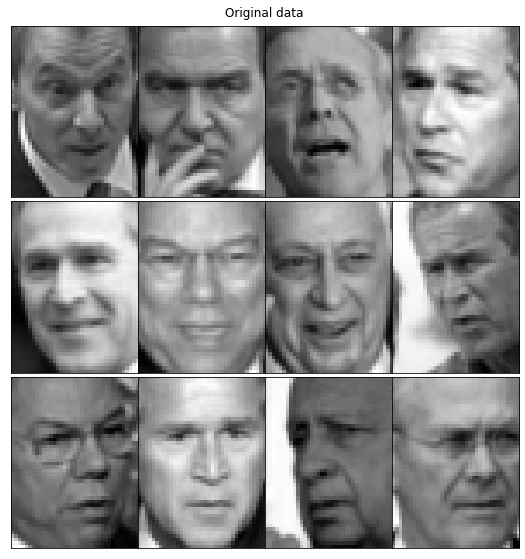

In [0]:
# Affichons les premières images
plot_images(d.data, 'Original data')

In [0]:
# Pour chaque target_names (personnalités pour lesquelles on a des images) on affiche le nombre d'images à disposition
a=0
for (i, name) in enumerate(d.target_names):
  print('target %d, name: %s, number of matches: %d' % (i, name, np.sum(d.target == i)))
  a=a+np.sum(d.target == i)


target 0, name: Ariel Sharon, number of matches: 77
target 1, name: Colin Powell, number of matches: 236
target 2, name: Donald Rumsfeld, number of matches: 121
target 3, name: George W Bush, number of matches: 530
target 4, name: Gerhard Schroeder, number of matches: 109
target 5, name: Hugo Chavez, number of matches: 71
target 6, name: Jacques Chirac, number of matches: 52
target 7, name: Jean Chretien, number of matches: 55
target 8, name: John Ashcroft, number of matches: 53
target 9, name: Junichiro Koizumi, number of matches: 60
target 10, name: Serena Williams, number of matches: 52
target 11, name: Tony Blair, number of matches: 144


In [0]:
d.target[:4]

array([11,  4,  2,  3])

In [0]:
for name in d.target_names:
  print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


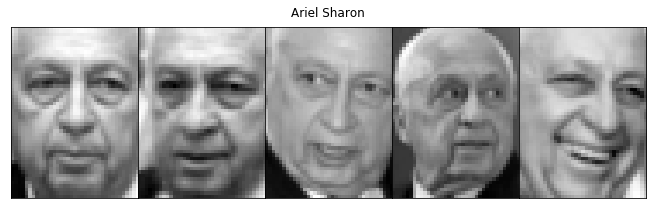

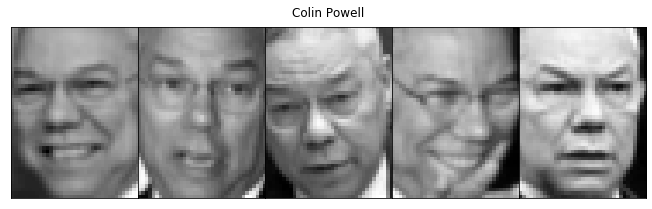

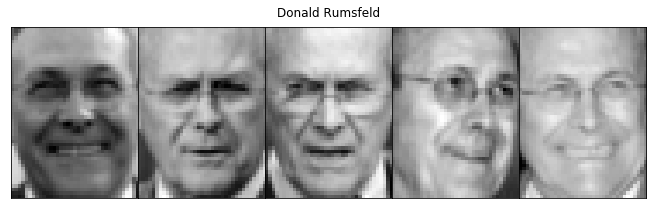

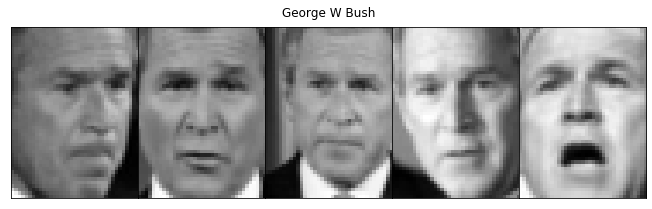

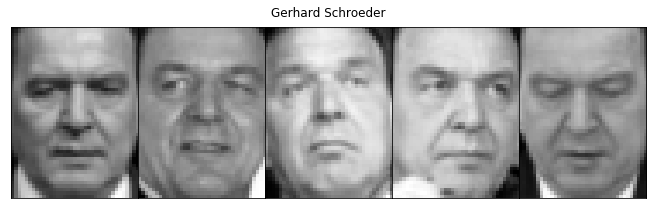

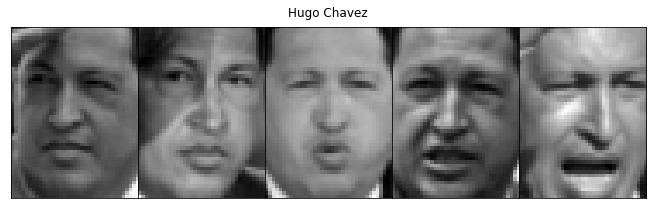

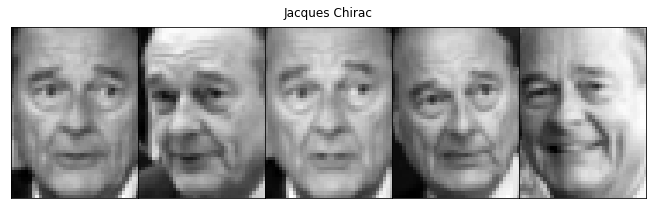

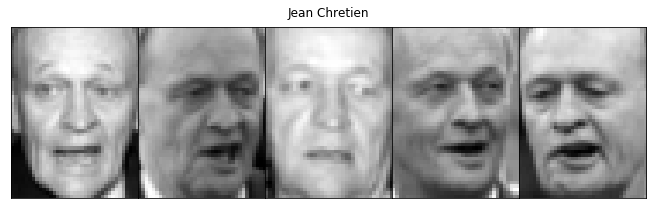

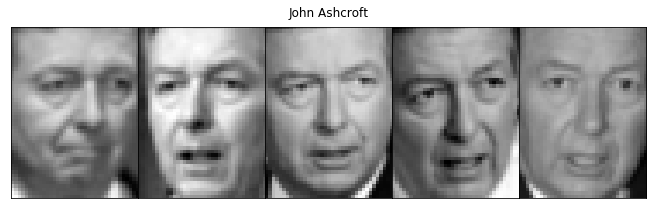

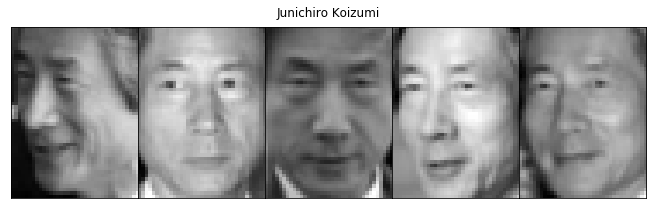

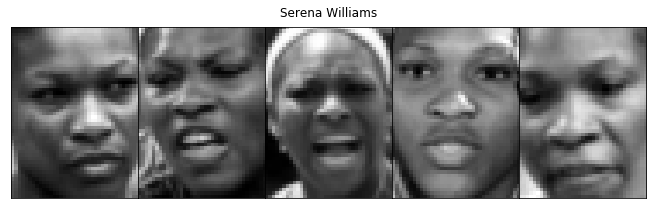

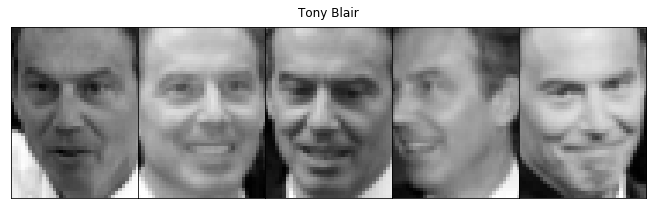

In [0]:
# Corsons un peu le problème:
# Pour chaque personnalité, affichez 5 photos de la base prises au hasard 

for pers in d.target_names:
  k = random.sample(range(len(im_pers(pers))),5)
  for j in range(len(d.target_names)) : 
    if (d.target_names==pers)[j]==True :
      plot_images(d.data[d.target==j][k],pers,n_col=5, n_row=1)

# Exploitation simple d'une ACP (5 points)

## a. Apprentissage et reconstruction 

Dans les cellules suivantes, vous allez calculer une ACP sur ces données d'images.

Attention à la normalisation. Vous pouvez soit effectuer cette normalisation à la main, soit explorer un peu [la doc de sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

$\Rightarrow$ Appelez `data_pca` les données en basse dimension  
$\Rightarrow$ Appelez `reconstruction` le résultat de la fonction `pca.inverse_transform` appliqué à `data_pca`. De quoi s'agit-il ? Affichez le

In [0]:
# Créez l'objet pca, et entrainez le sur les données...
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Calculez la transformée des images par ACP
x = d.data
x = StandardScaler().fit_transform(x) # On normalise les données des images

n_components = 200
pca = PCA(n_components=n_components) # On créé l'objet pca avec n_compenents composante
pca.fit(x) # On entraîne le modèle

data_pca = pca.transform(x) # On transforme les images par ACP

# calculez la reconstruction correspondante
reconstruction = pca.inverse_transform(data_pca)

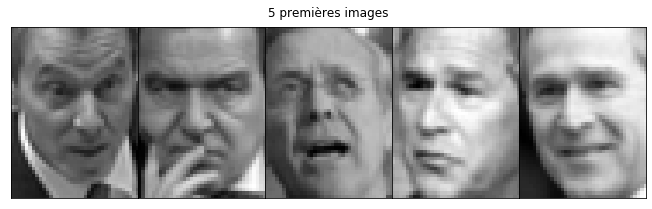

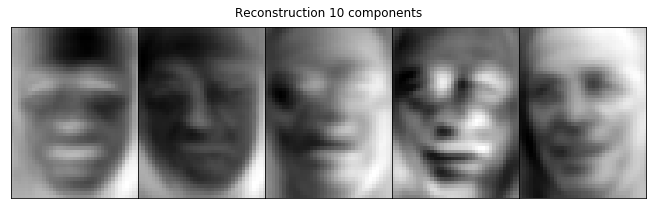

In [0]:
# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, title='5 premières images', n_row=1, n_col=5, shuffle=True)

# Affichez sur une ligne leur reconstruction, en indiquant le nombre de composantes dans le titre
plot_images(reconstruction, title='Reconstruction '+str(n_components)+' components', n_row=1, n_col=5, shuffle=True)

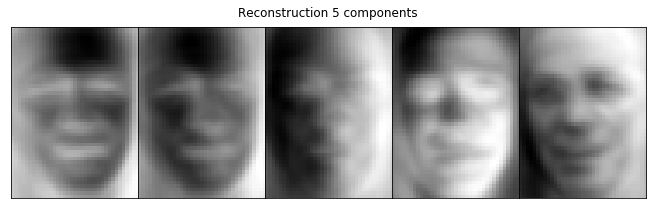

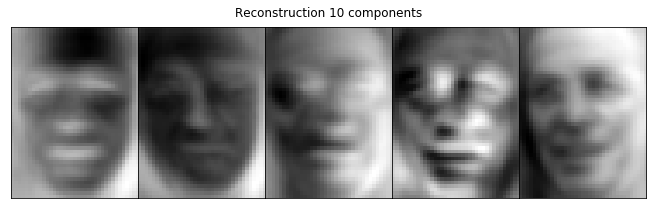

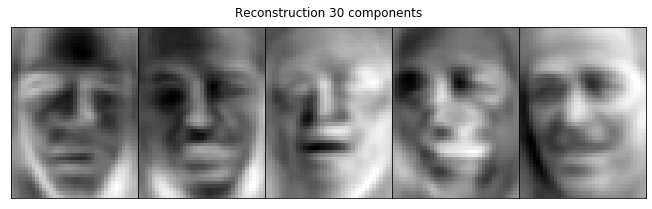

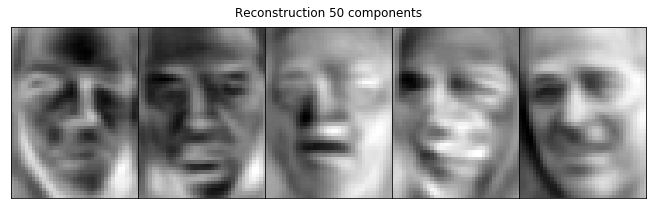

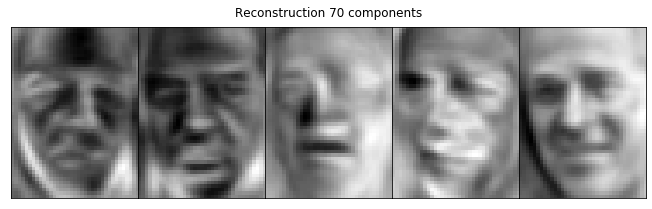

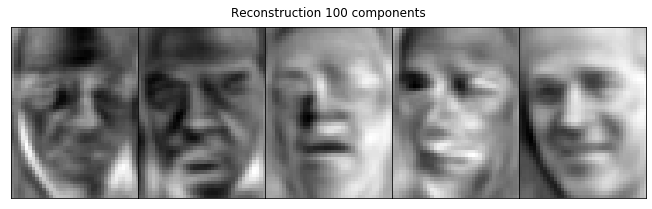

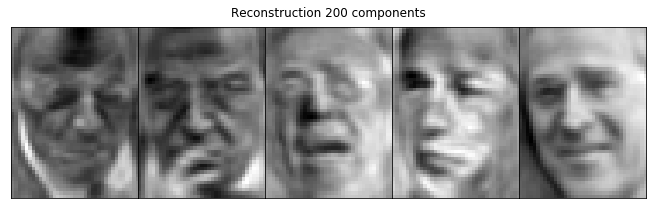

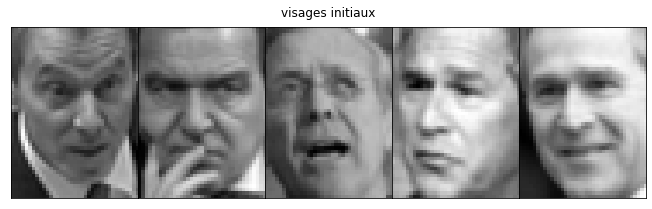

In [0]:
# Maintenant, pour les nombres de composantes suivants: 5, 10, 30, 50, 70, 100, 200, affichez les visages reconstruits sur une ligne
# puis les visages initiaux sur une ligne.
# Indice: vous avez deux options: réapprendre une ACP à chaque fois, ou bien réutiliser la même plusieurs fois.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def print_acp (n, d):
  x = d.data
  x = StandardScaler().fit_transform(x)

  pca = PCA(n_components=n)
  pca.fit(x)

  data_pca = pca.transform(x)

  # calculez la reconstruction correspondante
  reconstruction = pca.inverse_transform(data_pca)
  plot_images(reconstruction, title='Reconstruction '+str(n)+' components', n_row=1, n_col=5, shuffle=True)


for ncomp in [5, 10, 30, 50, 70, 100, 200]:
  print_acp(ncomp,d)

# Affichez sur une ligne les 5 premières images originales
plot_images(d.data, 'visages initiaux', n_row=1, n_col=5)


## b. Affichages par scores

Voyons si le score donné par l'ACP de `scikit-learn` peut être interprétable.

> Affichez les $10$ échantillons avec le meilleur score et les $10$ avec les pires scores. Interprétez  

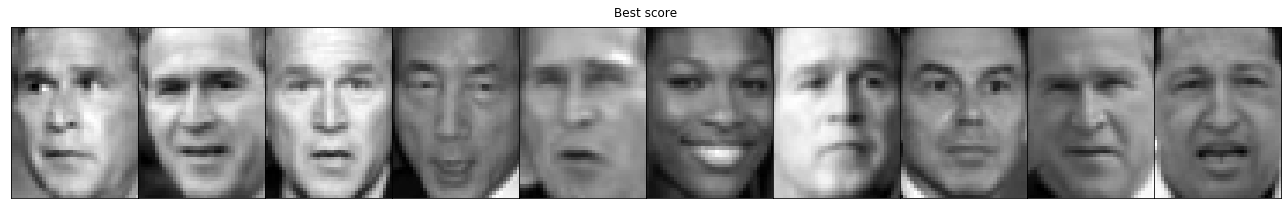

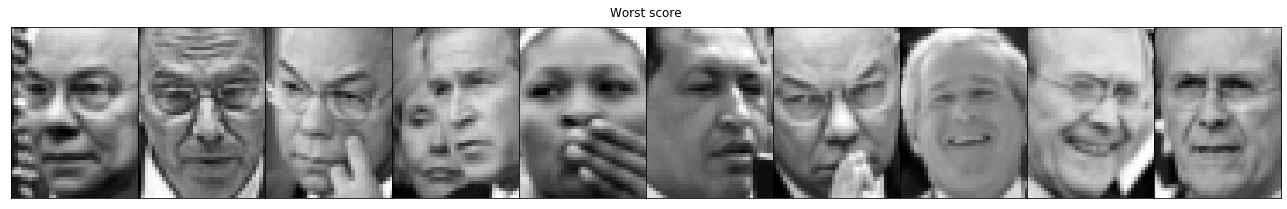

In [0]:
# extraction et tri des scores
s = pca.score_samples(d.data) # Extraction des scores
sorted_samples = np.argsort(s) # Tri dans l'ordre croissant et renvoie les index triés

best_sample = sorted_samples[-10:] # On récupère les index des meilleurs score (fin de la liste)
worst_sample = sorted_samples[:10] # On récupère les index des plus mauvais score (début de liste)

# Affichage les 10 images avec le score le plus faible, et celles avec le score le plus élevé
plot_images(d.data[best_sample],'Best score',n_col=10, n_row=1)
plot_images(d.data[worst_sample],'Worst score',n_col=10, n_row=1)

__Interprétation__  
Visiblement les images qui ont les meilleurs scores issuent d'une ACP à 200 composantes principales sont des images où l'on voit clairement les traits du visage. Il y a un bonne luminosité, des ombres ni trop ni pas assez présentent et rien ne cache le visage. Les traits du visages doivent être facilement reconnaissable. 

A l'inverse les images qui ont les plus mauvais score issuent de la même ACP sont les images où l'on distingue plus difficilement les traits du visage. Par exemple la main qui cache la bouche. On retrouve même une image où il y deux visages.

## b. Interprétation et discussion

Dans cette section, vous allez étudier certains paramètres appris par l'ACP, les afficher, et créer une cellule de texte où vous donnerez une discussion courte de ce qui vous semble pertinent.

> * Pour les affichages:  
>   $\Rightarrow$ utilisez `plt.plot`, `plt.grid`  
>   $\Rightarrow$ mettez des titres, nommez les axes
> * Pour les discussions:
>   concentrez vous sur l'essentiel: je ne noterai __PAS__ la quantité.

### `pca.explained_variance_ratio`

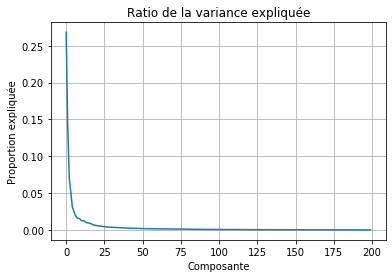

In [0]:
# plot de pca.explained_variance_ratio_
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_)
ax.set(xlabel='Composante', 
       ylabel='Proportion expliquée',
       title='Ratio de la variance expliquée')
ax.grid()
plt.show()

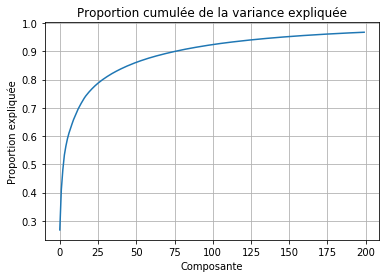

In [0]:
# # plot de pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots()
ax.plot(pca.explained_variance_ratio_.cumsum())
ax.set(xlabel='Composante', 
       ylabel='Proportion expliquée',
       title='Proportion cumulée de la variance expliquée')
ax.grid()
plt.show()

__De quoi s'agit-il ?__  
Il s'agit de l'analyse de la variance expliquée en fonction du nombre de composante. C'est l'analyse des valeurs propres de l'ACP :
- 1ere valeur propre : 0.28
- 2eme valeur propre : 0.14
- 3eme valeur propre : 0.07
- 4eme valeur propre : 0.05
- ...
- Dernière valeur propre : 0.0002


__Interprétez__  
On remarque qu'en prenant les 25 premières composantes, on explique environ 80% des données. Ainsi les premières composantes expliquent la mojorité des données.



### `pca.components_`

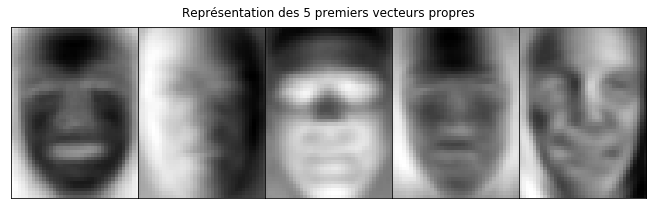

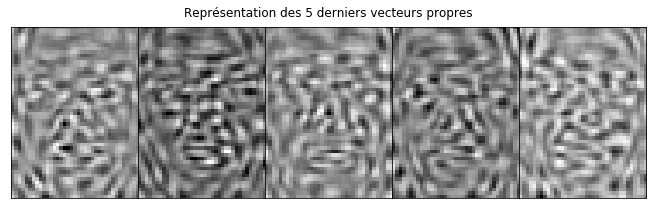

In [0]:
# Commencez par en affichez la dimension
pca.components_.shape

# Cela devrait vous rappeler quelque chose. Affichez.
plot_images(pca.components_[:5],'Représentation des 5 premiers vecteurs propres',n_col=5, n_row=1)
plot_images(pca.components_[-5:],'Représentation des 5 derniers vecteurs propres',n_col=5, n_row=1)

__De quoi s'agit-il ?__  
Il s'agit des vecteurs propore de l'ACP :
- Il y en a autant que le nombre de composante : 200
- Ils contiennent autant de valeur que de pixel dans une image : 50 x 37 = 1850 

__Interprétez__  
Ils ont le même nombre de valeur que les narray contenu dans d.data. On peut donc les afficher à l'aide de la fonction plot_images. Ainsi les images des representation des 5 premiers vecteurs propres 

# Analyses des précipitations en France (7 points)

Dans cette section, nous allons appliquer une ACP aux données de précipitations dans les grandes villes de France, déjà vues lors du premier TP. Il s'agit de rajouter l'ACP à l'arsenal d'outils de visualisation que nous avons vus. 

In [0]:
# imports
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

# Chargeons les données
raw_data = pandas.read_csv('https://husson.github.io/img/pluie.csv',
                       encoding = "ISO-8859-1", sep=';')

# renommons la première colonne "Ville"
raw_data = raw_data.rename(columns = {raw_data.columns[0]:'Ville'})

# choisissons cette colonne en index
raw_data = raw_data.set_index('Ville')

In [0]:
raw_data.head()

,JANVIERp,FEVRIERp,MARSp,AVRILp,MAIp,JUINp,JUILLETp,AOUTp,SEPTEMBREp,OCTOBREp,NOVEMBREp,DECEMBREp,Précipitations annuelles,JANVIERnb.j.pl,FEVRIERnb.j.pl,MARSnb.j.pl,AVRILnb.j.pl,MAInb.j.pl,JUINnb.j.pl,JUILLETnb.j.pl,AOUTnb.j.pl,SEPTEMBREnb.j.pl,OCTOBREnb.j.pl,NOVEMBREnb.j.pl,DECEMBREnb.j.pl,Nombre annuel de jours de pluie,Température moyenne annuelle,Amplitude annuelle des températures,Insolation annuelle,Latitude,Longitude,Précipitations de mai à aout,Précipitations sept-oct,Géographie
Ville,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ajaccio,78.0,69.0,51.0,39.0,43.0,23.0,10.0,15.0,43.0,81.0,105.0,96.0,653.0,12.0,10.0,9.0,9.0,8.0,4.0,1.0,2.0,6.0,10.0,11.0,13.0,95.0,14.71,14.5,2811.0,41.55,8.44,13.9,25.8,Sud
Angers,65.0,50.0,60.0,45.0,50.0,55.0,35.0,60.0,55.0,65.0,80.0,70.0,690.0,16.0,13.0,12.0,12.0,13.0,10.0,11.0,11.0,12.0,13.0,15.0,16.0,154.0,11.28,14.5,1899.0,47.28,-0.33,29.0,30.8,Ouest
Angoulème,79.0,68.0,64.0,62.0,70.0,58.0,53.0,66.0,69.0,70.0,79.0,88.0,826.0,16.0,14.0,13.0,12.0,14.0,11.0,12.0,12.0,12.0,13.0,15.0,16.0,160.0,12.02,14.9,1989.0,45.39,0.09,29.9,31.0,Ouest
Besançon,94.0,87.0,75.0,74.0,86.0,107.0,80.0,116.0,106.0,78.0,92.0,93.0,1088.0,17.0,14.0,12.0,14.0,14.0,14.0,14.0,13.0,13.0,14.0,15.0,15.0,169.0,10.04,17.6,1897.0,47.15,6.02,35.8,35.5,Est
Biarritz,128.0,105.0,98.0,102.0,100.0,91.0,69.0,123.0,155.0,152.0,175.0,176.0,1474.0,16.0,14.0,13.0,15.0,17.0,14.0,13.0,13.0,14.0,15.0,16.0,17.0,177.0,13.58,12.3,1921.0,43.29,-1.34,26.0,36.8,Ouest


## a. Utilisation simple ACP

Pour la suite:
1. Affichez une ACP des données de précipitations en 2D (deux composantes), avec pour chaque ville:
   * Son nom
   * La taille du point dépendant du volume total de précipitations
   * La couleur du point dépendant de la région.
2. Affichez une ACP du nombre de jours de pluie, calculée sur les colonnes (donc les mois), avec le nom des mois et la taille des points dépendants du nombre de jours de pluie moyen par mois. 

In [0]:
# ACP des précipitations par ville
# Importons scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = raw_data.columns[:12]
x = raw_data[data_columns]

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
x = StandardScaler().fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(x);



In [0]:
raw_data.columns[:12]

Index(['JANVIERp', 'FEVRIERp', 'MARSp', 'AVRILp', 'MAIp', 'JUINp', 'JUILLETp',
       'AOUTp', 'SEPTEMBREp', 'OCTOBREp', 'NOVEMBREp', 'DECEMBREp'],
      dtype='object')

In [0]:
x_transformed = pca.transform(x)
# créons un DataFrame pandas pour ces données transformées, de manière à les afficher de manière pratique
pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pandas.DataFrame(x_transformed, 
                            index=raw_data.index,
                            columns=pca_names)

# rajoutons l'info de région des données initiales
data_pca['Région'] = raw_data['Géographie']

import numpy as np
data_pca['interprétabilité'] = raw_data['Précipitations annuelles']
data_pca.head()


# affichons les premiers échantillons
data_pca.head()

,composante 0,composante 1,Région,interprétabilité
Ville,,,,
Ajaccio,-1.342505,3.772355,Sud,653.0
Angers,-1.095789,0.598962,Ouest,690.0
Angoulème,1.012135,-0.232093,Ouest,826.0
Besançon,4.387184,-2.976844,Est,1088.0
Biarritz,9.986850,-0.318951,Ouest,1474.0


In [0]:
!pip install adjustText
from adjustText import adjust_text

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=e7d8fa4186eadd5f98521bb4c222399940858f7a8c07f121ef009e3f211ee604
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


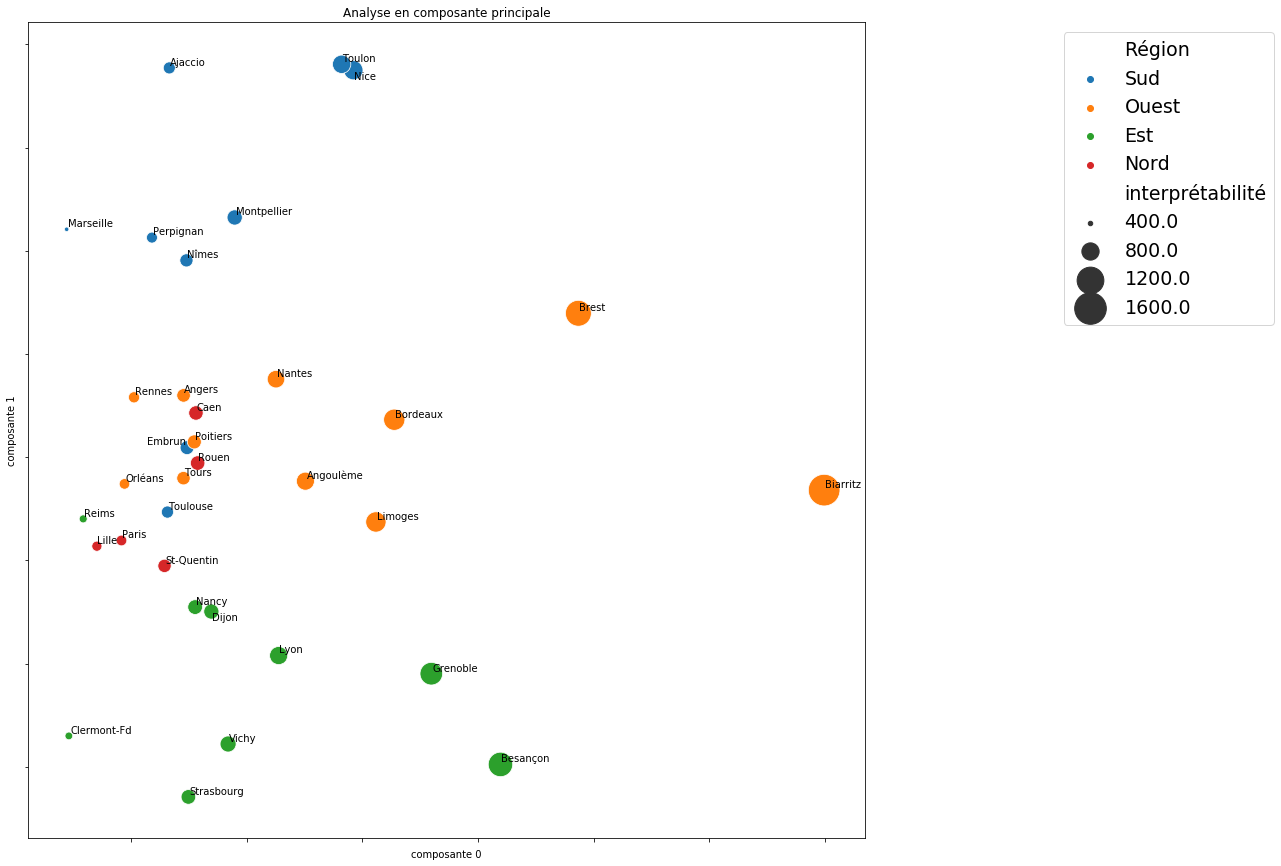

In [0]:
# le code est presque le même, on rajoute juste une information de taille
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='interprétabilité',
                sizes=(20,1000),
                data=data_pca,
                hue='Région')

# on agrandit la figure, on annote...
g.figure.set_size_inches(15,15)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.5, 1.0));

In [0]:
# ACP du nombre de jours de pluie par mois
...

In [0]:
# ACP des précipitations par ville
# Importons scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Extrayons les données de température
data_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T
x.head()

# Maintenant, normalisons les données, c'est très simple avec scikit-learn
x = StandardScaler().fit_transform(x)

# Procédons à l'ACP, avec 2 composantes
n_components = 2

# Cela se fait en créant d'abord un objet de type `PCA`
pca = PCA(n_components=n_components)

# Puis de l'appliquer sur les données
pca.fit(x);


In [0]:
data_columns = raw_data.columns[13:25]
x = raw_data[data_columns]
x = x.T
#x = x.rename(columns={x.columns[0]: 'Mois'})
#x = x.set_index(x.columns[0])
#raw_data = raw_data.set_index('Ville')
x.index


Index(['JANVIERnb.j.pl', 'FEVRIERnb.j.pl', 'MARSnb.j.pl', 'AVRILnb.j.pl',
       'MAInb.j.pl', 'JUINnb.j.pl', 'JUILLETnb.j.pl', 'AOUTnb.j.pl',
       'SEPTEMBREnb.j.pl', 'OCTOBREnb.j.pl', 'NOVEMBREnb.j.pl',
       'DECEMBREnb.j.pl'],
      dtype='object')

In [0]:
# appliquons l'ACP apprise
x_transformed = pca.transform(x)

print('Dimension initiale des données : ', x.shape)
print('          après ACP            : ', x_transformed.shape)



Dimension initiale des données :  (12, 34)
          après ACP            :  (12, 2)


In [0]:
x_transformed = pca.transform(x)
# créons un DataFrame pandas pour ces données transformées, de manière à les afficher de manière pratique
pca_names = ['composante %d' % d for d in range(n_components)]
data_pca = pandas.DataFrame(x_transformed, 
                            index=x.index,
                            columns=pca_names)

# rajoutons l'info de région des données initiales
#data_pca['Région'] = raw_data['Géographie']

import numpy as np
data_pca['Nombre de jour de pluie moyen'] = raw_data[data_columns].mean().T



# affichons les premiers échantillons
data_pca.head()

,composante 0,composante 1,Nombre de jour de pluie moyen
JANVIERnb.j.pl,85.745365,13.960060,14.588235
FEVRIERnb.j.pl,69.942147,11.861944,11.941176
MARSnb.j.pl,65.509530,5.477364,11.235294
AVRILnb.j.pl,66.624403,6.948404,11.470588
MAInb.j.pl,70.876295,5.167909,12.205882


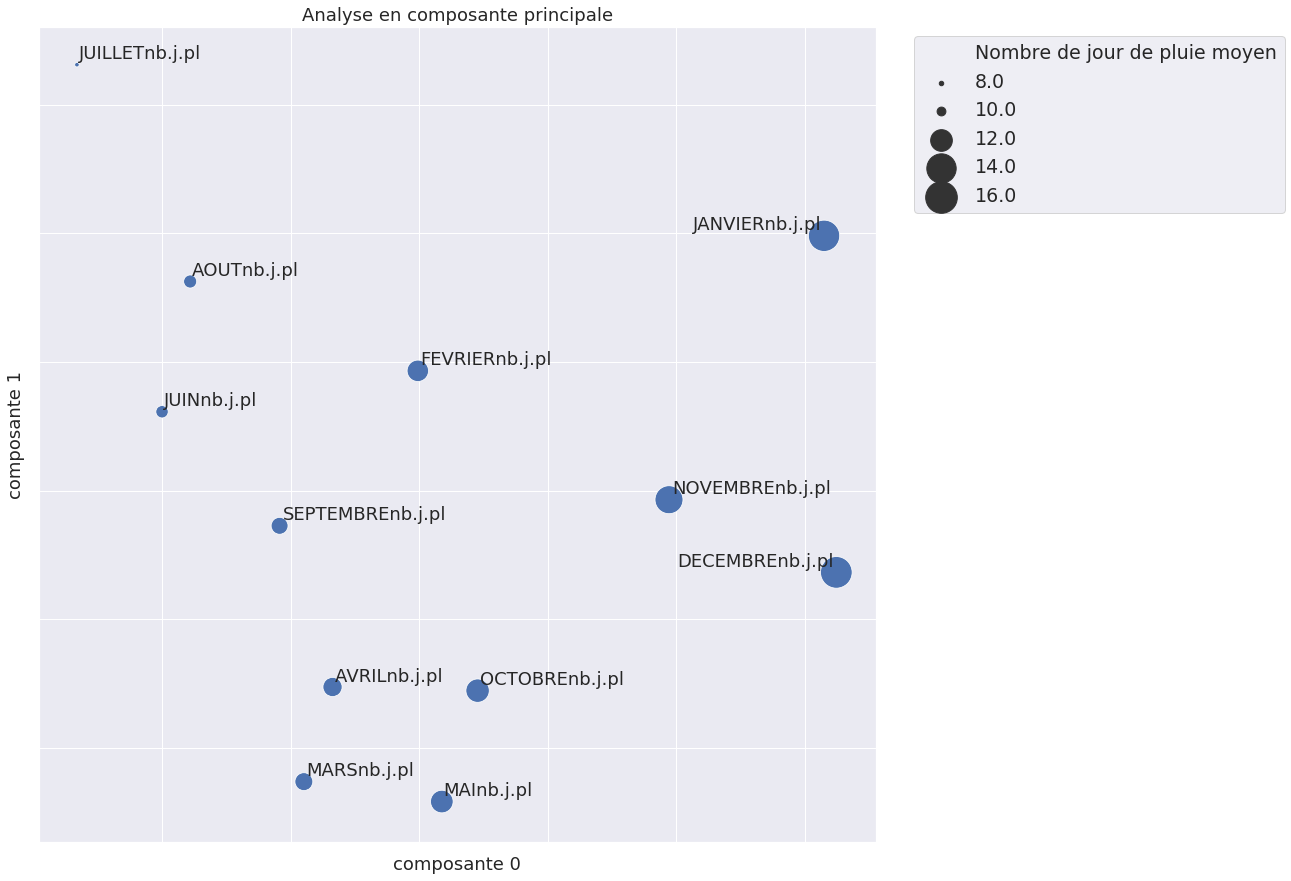

In [0]:
# le code est presque le même, on rajoute juste une information de taille
g = sns.scatterplot(x='composante 0',
                y='composante 1',
                size='Nombre de jour de pluie moyen',
                sizes=(20,1000),
                data=data_pca)

# on agrandit la figure, on annote...
g.figure.set_size_inches(15,15)
ax = plt.gca()
texts = []
for i, (text_x,text_y) in enumerate(data_pca.iloc[:,:2].to_numpy()):
  texts.append(ax.annotate(data_pca.index[i], (text_x,text_y)))
adjust_text(texts)

## on supprime les informations sur les axes, on rajout un titre et une légende
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])
plt.title('Analyse en composante principale');
plt.gca().legend(prop={'size': 19}, bbox_to_anchor=(1.5, 1.0));